In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("Iris.csv")

In [17]:
data = pd.read_csv("Iris.csv")
X = data.iloc[:, 1:5].values
y_labels = data.iloc[:, 5].values

# Map labels to numbers
classes = {label: idx for idx, label in enumerate(np.unique(y_labels))}
y = np.array([classes[label] for label in y_labels])

y_onehot = np.zeros((y.size, len(classes)))
y_onehot[np.arange(y.size), y] = 1

In [18]:
input_size = 4
hidden1_size = 10
hidden2_size = 8
hidden3_size = 6
output_size = 3
lr = 0.01
epochs = 500

In [19]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

In [20]:
np.random.seed(42)
W1 = np.random.randn(input_size, hidden1_size)
W2 = np.random.randn(hidden1_size, hidden2_size)
W3 = np.random.randn(hidden2_size, hidden3_size)
W4 = np.random.randn(hidden3_size, output_size)

In [23]:
for epoch in range(epochs):
    # Forward
    z1 = X.dot(W1); a1 = sigmoid(z1)
    z2 = a1.dot(W2); a2 = sigmoid(z2)
    z3 = a2.dot(W3); a3 = sigmoid(z3)
    z4 = a3.dot(W4); a4 = sigmoid(z4)

    # Loss
    loss = np.mean((y_onehot - a4)**2)

    # Backprop
    error_out = y_onehot - a4
    delta4 = error_out * sigmoid_deriv(a4)
    delta3 = delta4.dot(W4.T) * sigmoid_deriv(a3)
    delta2 = delta3.dot(W3.T) * sigmoid_deriv(a2)
    delta1 = delta2.dot(W2.T) * sigmoid_deriv(a1)

    # Update
    W4 += a3.T.dot(delta4) * lr
    W3 += a2.T.dot(delta3) * lr
    W2 += a1.T.dot(delta2) * lr
    W1 += X.T.dot(delta1) * lr

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss={loss:.4f}")


pred = np.argmax(a4, axis=1)

Epoch 0, Loss=0.0695
Epoch 100, Loss=0.0456
Epoch 200, Loss=0.0279
Epoch 300, Loss=0.0228
Epoch 400, Loss=0.0205


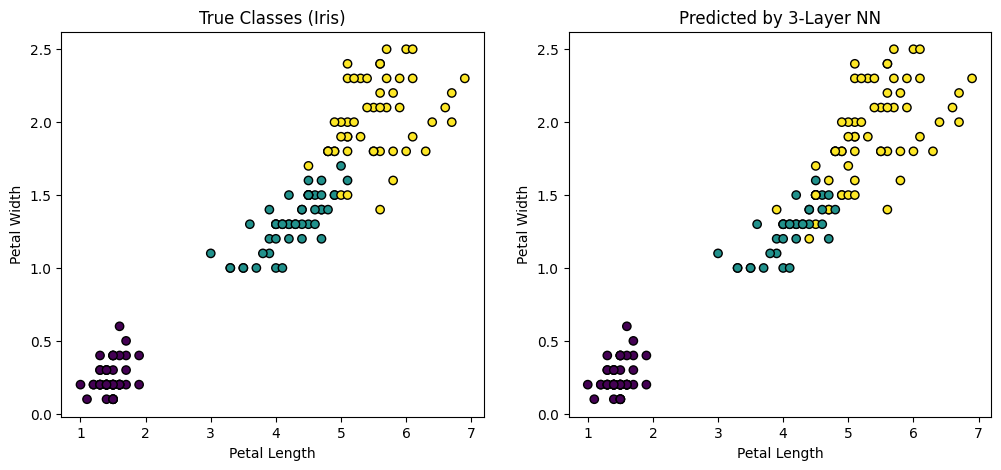

In [22]:
f1, f2 = 2, 3

plt.figure(figsize=(12,5))

# True labels
plt.subplot(1,2,1)
plt.scatter(X[:,f1], X[:,f2], c=y, cmap="viridis", edgecolors="k")
plt.title("True Classes (Iris)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Predicted labels
plt.subplot(1,2,2)
plt.scatter(X[:,f1], X[:,f2], c=pred, cmap="viridis", edgecolors="k")
plt.title("Predicted by 3-Layer NN")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.show()